In [8]:
from IPython.display import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

# Evaluating Different Signature Extraction Methods

I have tested the following:
1. Module 1 - Adapted from https://github.com/ahmetozlu/signature_extractor
2. Module 2 - Adapted from https://pypi.org/project/signature-detect/
3. Module 3 - Hybrid of Module 1 and 2
4. Module 4 - Adapter from https://github.com/saifkhichi96/signature-extraction
5. Module 5 - Hybrid of Module 1 and 4
6. Module 6 - Hybrid of Module 1,2 and 4

## Dataset Used

I have used a subset of the Tobacco800 dataset which contains 776 images of scanned documents with signatures on them. All images have accompanying xml files which contain various information including the bounding box information for the signatures. It stores the x and y coordinates for the top left edge of the bounding box and the width and height of the box.  
Since I am more comfortable with JSON, I converted this information into the following json format for each image:
```
{
    "filename.tif": [
        xmin,
        ymin,
        xmax,
        ymax
    ],
}
```
(xmin, ymin) --> top left edge of bbox, (xmax, ymax) --> bottom right edge of bbox.

Ground truth bbox coordinates were stored for all images using the ```dataset_docs_with_signs/json_data_ground_truth_bbox.py``` script

In [2]:
# Show ground truth bbox values
ground_truth_values_json = pd.read_json('assets/ground_truth_bbox.json')
ground_truth_values_json

,suh90a00.tif,amk00a00.tif,mwj41f00.tif,umw13f00.tif,fny38c00-page05_5.tif,fzx20e00-page02_2.tif,vdr55d00.tif,dgw64a00.tif,ciy01a00-page02_2.tif,wau30a00-page9_3.tif,...,lfj35f00.tif,fjx9aa00.tif,lec44c00.tif,wav95e00-page03_3.tif,hfv39d00.tif,jxp35f00.tif,eqp14e00-page02_2.tif,qit05f00-page2_36.tif,qit05f00-page2_22.tif,yrz52d00.tif
0,651,1234,651,1355,158,1254,511,1018,636,679,...,762,146,794,302,1635,727,1436,592,673,894
1,1123,2436,784,1952,1260,1614,1437,1586,756,1613,...,890,1641,1836,1888,2855,1345,1413,729,1175,1594
2,851,2140,964,2153,514,1692,1006,1358,849,1346,...,962,1200,1486,833,2306,849,2060,934,966,1295
3,1195,2809,860,2126,1360,1746,1552,1645,811,1794,...,988,1854,2011,2024,2965,1423,1576,875,1284,1718


## Predicting bboxes using the Various Modules

Bounding boxes are predicted for all images in the dataset for all the different modules. The bbox coordinates are saved in a JSON file in the following format:
```
{
    "filename.tif": [
        xmin,
        ymin,
        xmax,
        ymax
    ],
}
```

Predicted bbox coordniates were stored for all 6 modules using the ```serialize_predicted_bbox.py``` script

In [3]:
# Show predicted bbox values for all modules
predicted_1_values_json = pd.read_json('assets/calculated_bbox_1.json')
predicted_2_values_json = pd.read_json('assets/calculated_bbox_2.json')
predicted_3_values_json = pd.read_json('assets/calculated_bbox_3.json')
predicted_4_values_json = pd.read_json('assets/calculated_bbox_4.json')
predicted_5_values_json = pd.read_json('assets/calculated_bbox_5.json')
predicted_6_values_json = pd.read_json('assets/calculated_bbox_6.json')

# comment all except the one to print
predicted_1_values_json
predicted_2_values_json
predicted_3_values_json
predicted_4_values_json
predicted_5_values_json
predicted_6_values_json

,gmk15f00.tif,mub51a00.tif,fzh11c00-var.tif,dny38c00_5.tif,was45f00.tif,sfw98c00.tif,lfw39d00.tif,lfv39d00.tif,vbd23f00.tif,mzd01a00.tif,...,yas45f00.tif,cxi59c00_1.tif,wau30a00-page9_16.tif,ihz25e00.tif,arz92e00.tif,gxp01f00_1.tif,azb11c00.tif,aik94f00-page02_2.tif,pvx38c00-page06_6.tif,fbv15e00.tif
0,735,625,1881,991,720,977,1318,1579,1272,188,...,732,378,1456,1305,1280,135,260,597,851,1312
1,1095,1032,613,1453,813,1320,1654,1635,2467,371,...,934,1663,1729,1758,1732,116,2030,1286,634,2058
2,960,1026,2020,1191,855,1216,2098,2350,2327,307,...,837,617,2371,1787,2370,415,976,714,1376,2401
3,1177,1112,764,1544,886,1521,2402,3055,2900,420,...,1001,1803,1997,2780,3009,177,2173,1393,745,2691


## Evaluating accuracy using Intersection over Union ratio


This is the ratio of area of intersection of the ground truth bbox and the calculated bbox to the area of union of ground truth bbox and calculated bbox. If the two bboxes do not overlap at all then this ratio is 0 and if they overlap completely and are of equal dimensions then this ratio is 1.

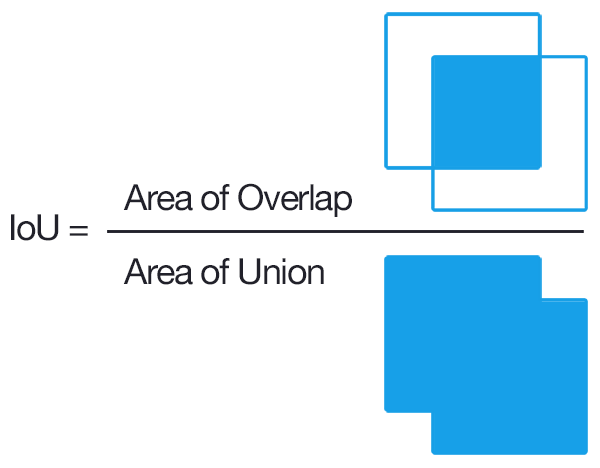

In [4]:
# Show iou visualization
Image('assets/iou.png')

In [5]:
# The following code example is used to calculate the iou ratio
# For this we must have the ground truth bbox top left and bottom right edge coordinates and
# the calculated bbox top left and bottom right edge coordinates

# ground truth bbox coordinates example values
xmin_gt = 774
ymin_gt = 1684
xmax_gt = 1160
ymax_gt = 1801

# calculated bbox coordinates example values
xmin_c = 766
ymin_c = 1662
xmax_c = 1168
ymax_c = 1809

# ground truth and calculated bbox areas for union area
gt_bbox_area = (xmax_gt - xmin_gt) * (ymax_gt - ymin_gt)
calc_bbox_area = (xmax_c - xmin_c) * (ymax_c - ymin_c)

union_area = gt_bbox_area * calc_bbox_area

# coordinates of intersection
xmin_inter = max(xmin_gt, xmin_c)
ymin_inter = max(ymin_gt, ymin_c)
xmax_inter = min(xmax_gt, xmax_c)
ymax_inter = min(ymax_gt, ymax_c)

# if the bboxes do not overlap then the ratio must be 0
if xmax_inter < xmin_inter or ymax_inter < ymin_inter:
    iou = 0.0
# if they do overlap then we use this formula
else:
    intersection_area = (xmax_inter - xmin_inter) * (ymax_inter - ymin_inter)
    iou = intersection_area / float(gt_bbox_area + calc_bbox_area - intersection_area)
    #get it in %age
    iou = round(iou * 100, 2)
    
print(f'IOU --> {iou}%')

IOU --> 76.42%


### Evaluating accuracy using Intersection over Union ratio

Intersection over union ratio is calculated for all images. The results are stored in a JSON file with the format:
```
{
    "filename.tif": {
        "ground_truth": [
            xmin,
            ymin,
            xmax,
            ymax
        ],
        "calculated": [
            xmin,
            ymin,
            xmax,
            ymax
        ],
        "intersection": [
            xmin,
            ymin,
            xmax,
            ymax
        ],
        "iou_in_percentage": 0.0
    },    
}
```

- (xmin, ymin) -> coordinates for top left edge of bbox for ground truth, calculated and intersection boxes  
- (xmax, ymax) -> coordinates for bottom right edge of bbox for ground truth, calculated and intersection boxes  
- iou_in_percentage -> Float value with the iou ratio * 100

    IOU values for all images were stored for all 6 modules using the ```FUIIIIL``` script

In [6]:
# Show iou results for all modules
iou_1_values_json = pd.read_json('assets/iou_3.json')
iou_2_values_json = pd.read_json('assets/iou_3.json')
iou_3_values_json = pd.read_json('assets/iou_3.json')
iou_4_values_json = pd.read_json('assets/iou_3.json')
iou_5_values_json = pd.read_json('assets/iou_3.json')
iou_6_values_json = pd.read_json('assets/iou_3.json')

# comment all except the one to print
iou_1_values_json
iou_2_values_json
iou_3_values_json
iou_4_values_json
iou_5_values_json
iou_6_values_json

,suh90a00.tif,amk00a00.tif,mwj41f00.tif,umw13f00.tif,fny38c00-page05_5.tif,fzx20e00-page02_2.tif,vdr55d00.tif,dgw64a00.tif,ciy01a00-page02_2.tif,wau30a00-page9_3.tif,...,lfj35f00.tif,fjx9aa00.tif,lec44c00.tif,wav95e00-page03_3.tif,hfv39d00.tif,jxp35f00.tif,eqp14e00-page02_2.tif,qit05f00-page2_36.tif,qit05f00-page2_22.tif,yrz52d00.tif
ground_truth,"[651, 1123, 851, 1195]","[1234, 2436, 2140, 2809]","[651, 784, 964, 860]","[1355, 1952, 2153, 2126]","[158, 1260, 514, 1360]","[1254, 1614, 1692, 1746]","[511, 1437, 1006, 1552]","[1018, 1586, 1358, 1645]","[636, 756, 849, 811]","[679, 1613, 1346, 1794]",...,"[762, 890, 962, 988]","[146, 1641, 1200, 1854]","[794, 1836, 1486, 2011]","[302, 1888, 833, 2024]","[1635, 2855, 2306, 2965]","[727, 1345, 849, 1423]","[1436, 1413, 2060, 1576]","[592, 729, 934, 875]","[673, 1175, 966, 1284]","[894, 1594, 1295, 1718]"
calculated,"[678, 658, 891, 739]","[56, 3022, 2071, 3056]","[782, 785, 979, 873]","[1126, 167, 1491, 354]","[198, 1549, 906, 1622]","[493, 2380, 1402, 2608]","[2200, 1492, 2412, 1682]","[308, 514, 951, 683]","[688, 748, 861, 810]","[578, 1649, 1340, 1800]",...,"[603, 1089, 993, 1206]","[169, 1662, 806, 1810]","[819, 1850, 1151, 2015]","[290, 2194, 1094, 2297]","[1637, 2872, 2299, 2959]","[301, 1338, 1080, 1419]","[1451, 1427, 2058, 1538]","[483, 261, 815, 883]","[602, 296, 787, 584]","[906, 1601, 983, 1718]"
intersection,"[678, 1123, 851, 739]","[1234, 3022, 2071, 2809]","[782, 785, 964, 860]","[1355, 1952, 1491, 354]","[198, 1549, 514, 1360]","[1254, 2380, 1402, 1746]","[2200, 1492, 1006, 1552]","[1018, 1586, 951, 683]","[688, 756, 849, 810]","[679, 1649, 1340, 1794]",...,"[762, 1089, 962, 988]","[169, 1662, 806, 1810]","[819, 1850, 1151, 2011]","[302, 2194, 833, 2024]","[1637, 2872, 2299, 2959]","[727, 1345, 849, 1419]","[1451, 1427, 2058, 1538]","[592, 729, 815, 875]","[673, 1175, 787, 584]","[906, 1601, 983, 1718]"
iou_in_percentage,0,0,49.68,0,0,0,0,0,63.24,68.49,...,0,41.99,43.66,0,78.03,14.2,66.24,14.54,0,18.12


## Results

I plotted the frequency of iou value for different intervals from 0% to 100%

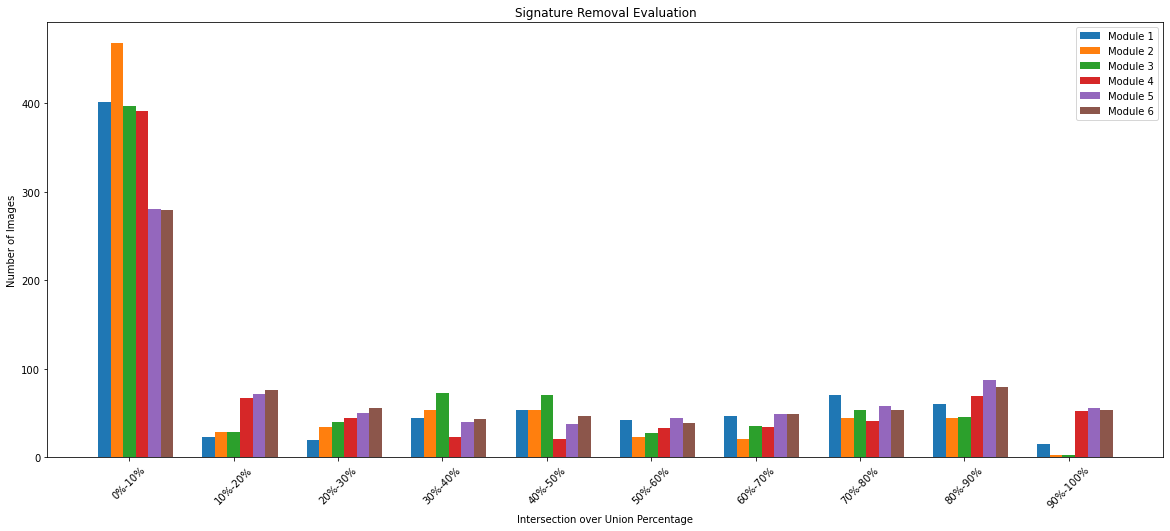

In [9]:
def visualize_evaluation(evaluation_json):
    f = open(evaluation_json, )
    evaluation_data = json.load(f)
    f.close()

    zero_to_ten, ten_to_twenty, twenty_to_thirty, thirty_to_forty, forty_to_fifthy, fifthy_to_sixty, \
    sixty_to_seventy, seventy_to_eighty, eighty_to_ninety, ninety_to_hundered = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

    for filename in evaluation_data.keys():
        if evaluation_data[filename]['iou_in_percentage'] < 10:
            zero_to_ten = zero_to_ten + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 20:
            ten_to_twenty = ten_to_twenty + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 30:
            twenty_to_thirty = twenty_to_thirty + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 40:
            thirty_to_forty = thirty_to_forty + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 50:
            forty_to_fifthy = forty_to_fifthy + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 60:
            fifthy_to_sixty = fifthy_to_sixty + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 70:
            sixty_to_seventy = sixty_to_seventy + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 80:
            seventy_to_eighty = seventy_to_eighty + 1
        elif evaluation_data[filename]['iou_in_percentage'] < 90:
            eighty_to_ninety = eighty_to_ninety + 1
        elif evaluation_data[filename]['iou_in_percentage'] <= 100:
            ninety_to_hundered = ninety_to_hundered + 1

    # Plot
    x_axis_labels = [
        '0%-10%', '10%-20%', '20%-30%', '30%-40%', '40%-50%', '50%-60%', '60%-70%',
        '70%-80%', '80%-90%', '90%-100%'
    ]
    frequency = [
        zero_to_ten, ten_to_twenty, twenty_to_thirty, thirty_to_forty,
        forty_to_fifthy, fifthy_to_sixty, sixty_to_seventy, seventy_to_eighty,
        eighty_to_ninety, ninety_to_hundered
    ]

    return x_axis_labels, frequency


# Module 1
iou_1_json = 'assets/iou_1.json'
x_axis_labels, frequency_module_1 = visualize_evaluation(iou_1_json)
# Module 2
iou_2_json = 'assets/iou_2.json'
x_axis_labels, frequency_module_2 = visualize_evaluation(iou_2_json)
# Module 3
iou_3_json = 'assets/iou_3.json'
x_axis_labels, frequency_module_3 = visualize_evaluation(iou_3_json)
# Module 4
iou_4_json = 'assets/iou_4.json'
x_axis_labels, frequency_module_4 = visualize_evaluation(iou_4_json)
# Module 5
iou_5_json = 'assets/iou_5.json'
x_axis_labels, frequency_module_5 = visualize_evaluation(iou_5_json)
# Module 6
iou_6_json = 'assets/iou_6.json'
x_axis_labels, frequency_module_6 = visualize_evaluation(iou_6_json)

fig = plt.figure(figsize=(20, 8))
w = 0.12
X_axis_1 = np.arange(len(x_axis_labels))
X_axis_2 = [i+w for i in X_axis_1]
X_axis_3 = [i+w for i in X_axis_2]
X_axis_4 = [i+w for i in X_axis_3]
X_axis_5 = [i+w for i in X_axis_4]
X_axis_6 = [i+w for i in X_axis_5]

plt.bar(X_axis_1, frequency_module_1, w, label='Module 1')
plt.bar(X_axis_2, frequency_module_2, w, label='Module 2')
plt.bar(X_axis_3, frequency_module_3, w, label='Module 3')
plt.bar(X_axis_4, frequency_module_4, w, label='Module 4')
plt.bar(X_axis_5, frequency_module_5, w, label='Module 5')
plt.bar(X_axis_6, frequency_module_6, w, label='Module 6')


plt.xticks(X_axis_3, x_axis_labels) # keep in center
plt.xticks(rotation=45)
plt.xlabel("Intersection over Union Percentage")
plt.ylabel("Number of Images")
plt.title("Signature Removal Evaluation")
plt.legend()
plt.show()